In [1]:
import keras
import sklearn.metrics as metrics
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
data = mnist.load_data()
x_train = data[0][0]
#print(x_train)
y_train = data[0][1]
x_test = data[1][0]
y_test = data[1][1]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
img_rows, img_cols = x_train.shape[1:3]
print(img_rows)
print(img_cols)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
28
28


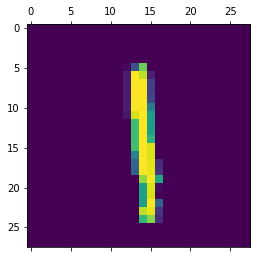

In [3]:
plt.matshow(x_train[8])

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print(input_shape)

(28, 28, 1)


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
num_categories = 10
y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_categories, activation='softmax'))

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 130s 277ms/step - loss: 2.2747 - accuracy: 0.1720 - val_loss: 2.2400 - val_accuracy: 0.4228
Epoch 2/20
469/469 [==============================] - 138s 293ms/step - loss: 2.2170 - accuracy: 0.2876 - val_loss: 2.1647 - val_accuracy: 0.5965
Epoch 3/20
469/469 [==============================] - 137s 292ms/step - loss: 2.1360 - accuracy: 0.3964 - val_loss: 2.0594 - val_accuracy: 0.6677
Epoch 4/20
469/469 [==============================] - 139s 297ms/step - loss: 2.0224 - accuracy: 0.4744 - val_loss: 1.9111 - val_accuracy: 0.7080
Epoch 5/20
469/469 [==============================] - 131s 279ms/step - loss: 1.8753 - accuracy: 0.5306 - val_loss: 1.7196 - val_accuracy: 0.7445
Epoch 6/20
469/469 [==============================] - 125s 267ms/step - loss: 1.6941 - accuracy: 0.5807 - val_loss: 1.5004 - val_accuracy: 0.7724
Epoch 7/20
469/469 [==============================] - 125s 266ms/step - loss: 1.5050 - accuracy: 0.6150 - val_loss: 1.2831 -

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Hyperparameters : {} \n".format(model.optimizer.get_config()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Hyperparameters : {'name': 'Adadelta', 'learning_rate': 0.001, 'decay': 0.0, 'rho': 0.95, 'epsilon': 1e-07} 

Test loss: 0.4479694962501526
Test accuracy: 0.8834999799728394


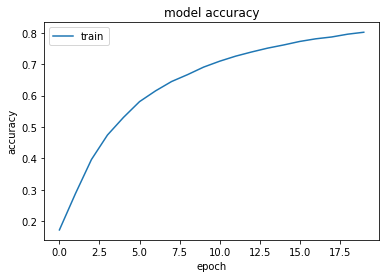

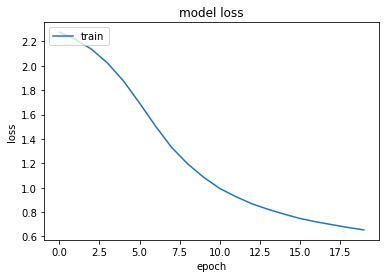

In [11]:
#Plotting the graph of accuracy VS epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

#Plotting the graph of loss VS epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

Text(69.0, 0.5, 'Truth')

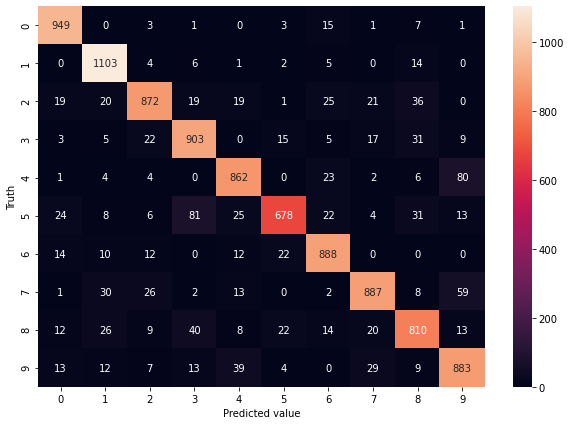

In [19]:
y_predict=model.predict(x_test)
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))
#y_true=y_test
#res = tf.math.confusion_matrix(y_true,y_predict)
'''
plot_confusion_matrix(classifier, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=normalize)'''
plt.figure(figsize = (10,7))
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Truth')

In [22]:
matrix

array([[ 949,    0,    3,    1,    0,    3,   15,    1,    7,    1],
       [   0, 1103,    4,    6,    1,    2,    5,    0,   14,    0],
       [  19,   20,  872,   19,   19,    1,   25,   21,   36,    0],
       [   3,    5,   22,  903,    0,   15,    5,   17,   31,    9],
       [   1,    4,    4,    0,  862,    0,   23,    2,    6,   80],
       [  24,    8,    6,   81,   25,  678,   22,    4,   31,   13],
       [  14,   10,   12,    0,   12,   22,  888,    0,    0,    0],
       [   1,   30,   26,    2,   13,    0,    2,  887,    8,   59],
       [  12,   26,    9,   40,    8,   22,   14,   20,  810,   13],
       [  13,   12,    7,   13,   39,    4,    0,   29,    9,  883]],
      dtype=int64)

In [23]:
#Calculating evaluation metrics of the model
cf_m = matrix
#print(cf_m)

true_positive = []
true_negative = []
false_positive = []
false_negative = []


for i in range(10):
    for j in  range(10):
        if i==j:
            true_positive.append(cf_m[i][j])

print("True positive of values from 0 to 9 : {}".format(true_positive))

total_val = 0
for i in range(10):
    for j in  range(10):
        total_val += cf_m[i][j]
            
for i in range(10):
    for j in  range(10):
        sum_val = 0
        if i!=j:
            sum_val += int(cf_m[i][j])
        false_negative.append(sum_val)
        
for i in range(10):
    for j in  range(10):
        sum_val = 0
        if i!=j:
            sum_val += cf_m[j][i]
        false_positive.append(sum_val)


false_negative_list = []
i = 0
while(i<len(false_negative)):
    count = 0
    val = 0
    while(count<10):
        val = val + false_negative[i]
        i = i+1
        count = count+1
    false_negative_list.append(val)
    
print("False negative of values from 0 to 9 : {}".format(false_negative_list))

false_positive_list = []
i = 0
while(i<len(false_positive)):
    count = 0
    val = 0
    while(count<10):
        val = val + false_positive[i]
        i = i+1
        count = count+1
    false_positive_list.append(val)

print("False positive of values from 0 to 9 : {}".format(false_positive_list))

for i in range(10):
    val = total_val - false_positive_list[i] - false_negative_list[i] - true_positive[i]
    true_negative.append(val)



print("True negative of values from 0 to 9 : {}".format(true_negative))


True positive of values from 0 to 9 : [949, 1103, 872, 903, 862, 678, 888, 887, 810, 883]
False negative of values from 0 to 9 : [31, 32, 160, 107, 120, 214, 70, 141, 164, 126]
False positive of values from 0 to 9 : [87, 115, 93, 162, 117, 69, 111, 94, 142, 175]
True negative of values from 0 to 9 : [8933, 8750, 8875, 8828, 8901, 9039, 8931, 8878, 8884, 8816]


In [24]:
sensitivity = []
specificity = []
precision = []
F1_score = []

for i in range(10):
    sensitivity_val = round(true_positive[i] / (true_positive[i] + false_negative_list[i]),2)
    sensitivity.append(sensitivity_val)
    
    specificity_val = round((true_negative[i] / (false_positive_list[i] +  true_negative[i])),2)
    specificity.append(specificity_val)
    
    precision_val = round((true_positive[i]/ (true_positive[i] + false_positive_list[i])),2)
    precision.append(precision_val)
    
    F1_val = round(2*((sensitivity_val*precision_val)/(sensitivity_val+precision_val)))
    F1_score.append(F1_val)
    
evaluation_metrices = []
num_list = [0,1,2,3,4,5,6,7,8,9]

evaluation_metrices.append(num_list)
evaluation_metrices.append(sensitivity)
evaluation_metrices.append(specificity)
evaluation_metrices.append(precision)
evaluation_metrices.append(F1_score)
    
print(evaluation_metrices)    

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0.97, 0.97, 0.84, 0.89, 0.88, 0.76, 0.93, 0.86, 0.83, 0.88], [0.99, 0.99, 0.99, 0.98, 0.99, 0.99, 0.99, 0.99, 0.98, 0.98], [0.92, 0.91, 0.9, 0.85, 0.88, 0.91, 0.89, 0.9, 0.85, 0.83], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


In [25]:
[list(i) for i in zip(*evaluation_metrices)]

[[0, 0.97, 0.99, 0.92, 1.0],
 [1, 0.97, 0.99, 0.91, 1.0],
 [2, 0.84, 0.99, 0.9, 1.0],
 [3, 0.89, 0.98, 0.85, 1.0],
 [4, 0.88, 0.99, 0.88, 1.0],
 [5, 0.76, 0.99, 0.91, 1.0],
 [6, 0.93, 0.99, 0.89, 1.0],
 [7, 0.86, 0.99, 0.9, 1.0],
 [8, 0.83, 0.98, 0.85, 1.0],
 [9, 0.88, 0.98, 0.83, 1.0]]